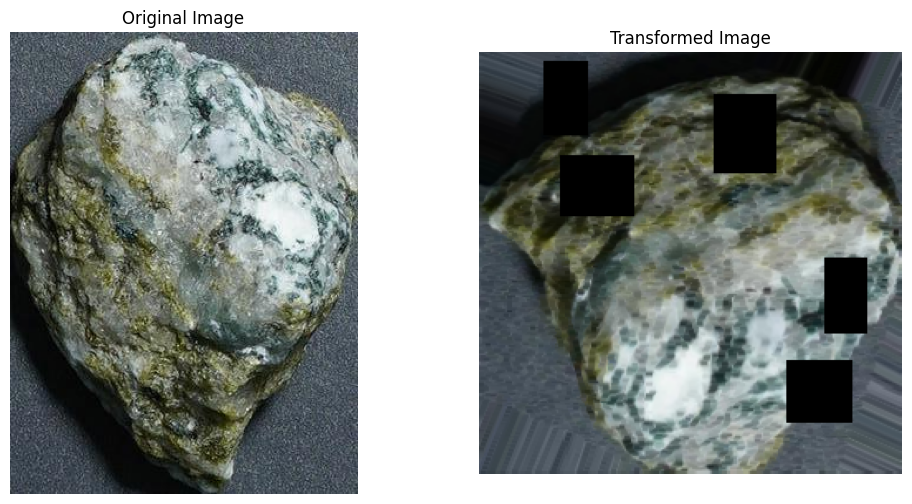

In [223]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import albumentations as A
from albumentations.pytorch import ToTensorV2

# 이미지 로드
image = cv2.imread(r'G:\open\open\train\Weathered_Rock\TRAIN_00005.jpg')  # 예시: 이미지 경로 지정
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV는 BGR 포맷으로 읽기 때문에 RGB로 변환

# 예시로 적용할 트랜스포메이션
transform = A.Compose([
    A.Resize(256, 256, interpolation=cv2.INTER_CUBIC),
    A.Affine(rotate=(-360,360),shear={"x": (-10, 10), "y": (-10, 10)}, border_mode = 1,p = 1 ),
    A.GridDistortion(num_steps=5, distort_limit=0.2, p= 0.5),
    A.Morphological(scale = (1,3), operation="erosion",p = 0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p = 0.5),
    A.RandomRotate90(p=0.5),
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
    A.CoarseDropout(num_holes_range=(3, 5) , p = 0.5 ),
    A.RandomResizedCrop( size = (256,256), scale = (0.7,1),ratio=(0.75, 1.33), p=0.5),  # Random zoom effect
    # A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    
    ToTensorV2()
])

# 원본 이미지와 변환된 이미지
transformed = transform(image=image)
transformed_image = transformed['image']

# 시각화: 원본 이미지와 변환된 이미지 비교
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 원본 이미지 시각화
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# 변환된 이미지 시각화
# ToTensorV2로 변환된 이미지는 [C, H, W] 형태로 나오기 때문에, [H, W, C]로 변환해야 합니다.
axes[1].imshow(np.transpose(transformed_image.numpy(), (1, 2, 0)))
axes[1].set_title("Transformed Image")
axes[1].axis('off')

plt.show()


AttributeError: 'NoneType' object has no attribute 'shaep'